In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

%load_ext jupyter_black

## Circular Models

### Table of Contents

#### Symmetric distributions

- [Circular uniform distribution](#circular-uniform-distribution)
- [Triangular distribution](#triangular-distribution)
- [Cardioid distribution](#cardioid-distribution)
- [Cartwright distribution](#cartwright-distribution)
- [wrapped Normal distribution](#wrapped-normal-distribution)
- [wrapped Cauchy distribution](#wrapped-cauchy-distribution)
- [von Mises distribution](#von-mises-distribution)
- [Jones-Pewsey distribution](#jones-pewsey-distribution)
- [Flat-topped von Mises Distribution](#flat-topped-von-mises-distribution)


#### Asymmetric distributions

- [Sine-Skewed Jones-Pewsey Distribution](#sine-skewed-jones-pewsey-distribution)
- [Asymmetric Extended Jones-Pewsey Distribution](#asymmetric-extended-jones-pewsey-distribution)
- [Inverse Batschelet distribution](#inverse-batschelet-distribution)

## Symmetric distributions

### Circular uniform distribution

/var/folders/2g/cw502gdd0hj9q05c6n34nkvr0000gn/T/ipykernel_8369/3993589730.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax["a"].legend(frameon=False)


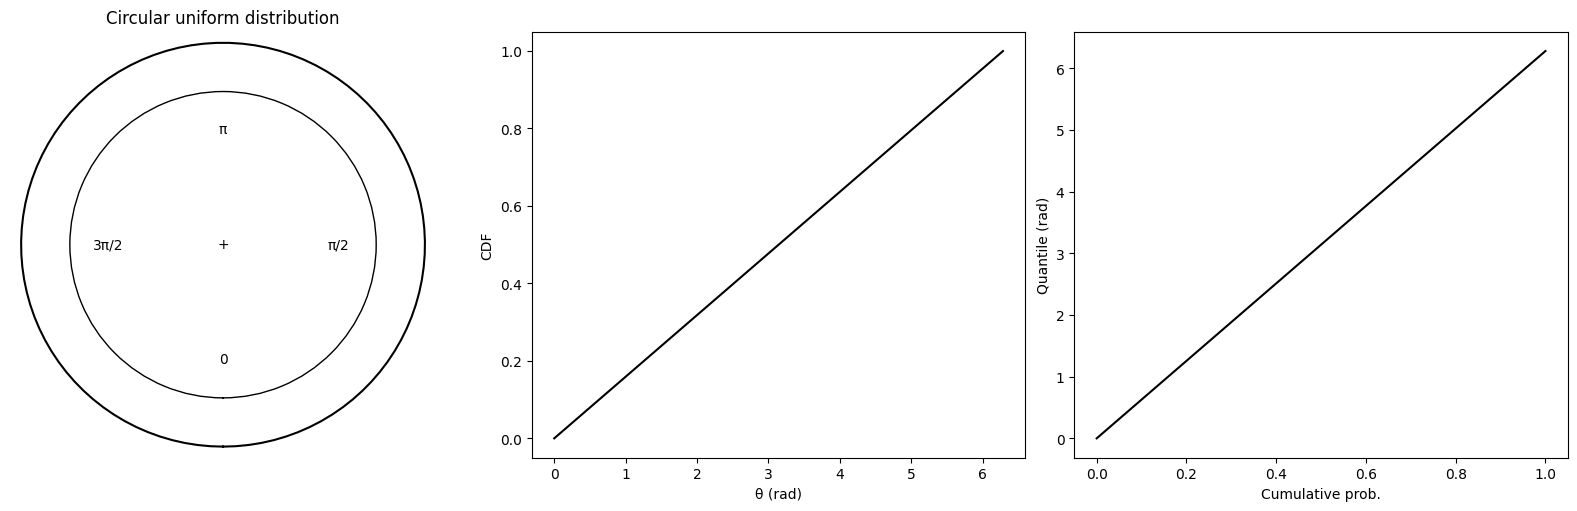

In [2]:
from pycircstat2.distributions import circularuniform

n = 100
x = np.linspace(0, 2 * np.pi, n)

fig, ax = plt.subplot_mosaic(
    "abc",
    figsize=(16, 5),
    per_subplot_kw={"a": {"projection": "polar"}},
    layout="constrained",
)

ax["a"].plot(
    x,
    circularuniform.pdf(x) + 1,
    linestyle="-",
    color="black",
)

rtick = [0, 1]
ax["a"].set_theta_zero_location("S")
ax["a"].spines["polar"].set_visible(False)
ax["a"].set_rgrids(rtick, ["" for _ in range(len(rtick))], fontsize=16)
gridlines = ax["a"].yaxis.get_gridlines()
gridlines[-1].set_color("k")
gridlines[-1].set_linewidth(1)

# position_major = np.arange(0, 2 * np.pi, 2 * np.pi / 4)
position_major = []
ax["a"].xaxis.set_major_locator(ticker.FixedLocator(position_major))

ax["a"].text(
    x=0,
    y=0,
    s="+",
    ha="center",
    va="center",
    color="black",
)
labels = ["0", "π/2", "π", "3π/2"]
for i, angle in enumerate([0, np.pi / 2, np.pi, 3 * np.pi / 2]):
    ax["a"].text(x=angle, y=0.75, s=labels[i], ha="center", va="center", color="black")

ax["a"].legend(frameon=False)
ax["a"].set_title("Circular uniform distribution")


ax["b"].plot(x, circularuniform.cdf(x), linestyle="-", color="black")
ax["b"].set_xlabel("θ (rad)")
ax["b"].set_ylabel("CDF")

p = np.linspace(1e-16, 1 - 1e-16, 100)
ax["c"].plot(p, circularuniform.ppf(p), linestyle="-", color="black")
ax["c"].set_xlabel("Cumulative prob.")
ax["c"].set_ylabel("Quantile (rad)")

fig.savefig("../docs/docs/images/circ-mod-circularuniform.png")

### Triangular distribution

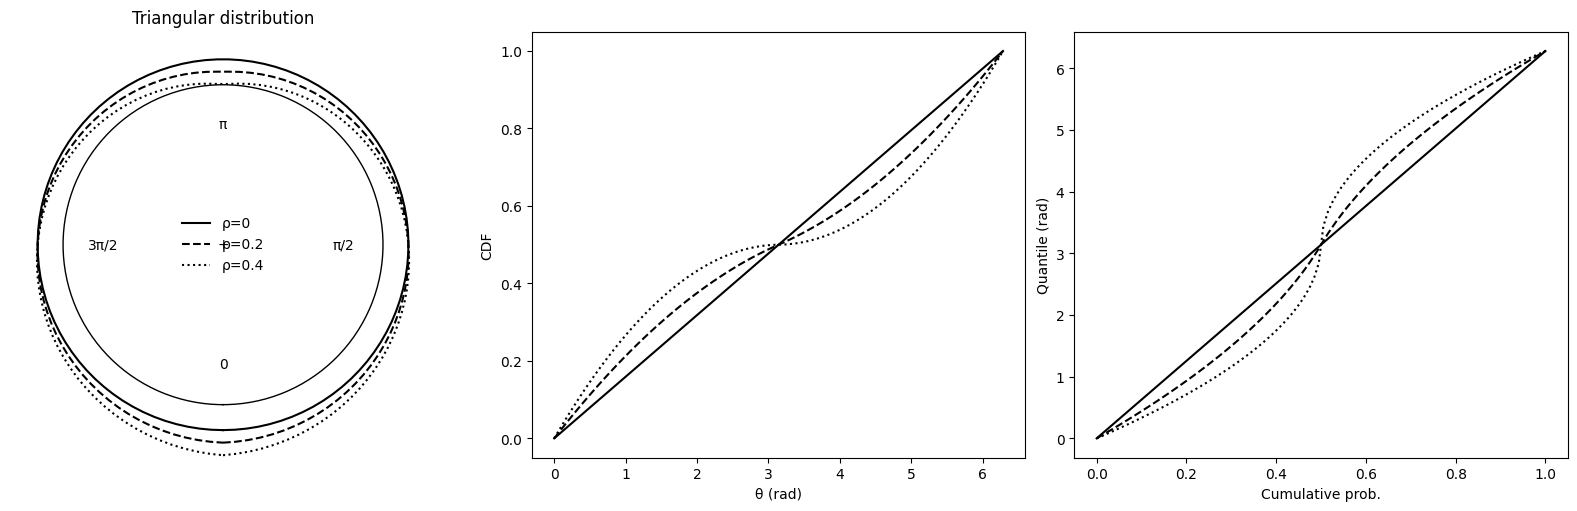

In [3]:
from pycircstat2.distributions import triangular

n = 100
x = np.linspace(0, 2 * np.pi, n)

fig, ax = plt.subplot_mosaic(
    "abc",
    figsize=(16, 5),
    per_subplot_kw={"a": {"projection": "polar"}},
    layout="constrained",
)
ax["a"].plot(
    x,
    triangular.pdf(x, rho=0) + 1,
    linestyle="-",
    color="black",
    label="ρ=0",
)
ax["a"].plot(
    x,
    triangular.pdf(x, rho=0.2) + 1,
    linestyle="--",
    color="black",
    label="ρ=0.2",
)
ax["a"].plot(
    x,
    triangular.pdf(x, rho=0.4) + 1,
    linestyle=":",
    color="black",
    label="ρ=0.4",
)

rtick = [0, 1]
ax["a"].set_theta_zero_location("S")
ax["a"].spines["polar"].set_visible(False)
ax["a"].set_rgrids(rtick, ["" for _ in range(len(rtick))], fontsize=16)
gridlines = ax["a"].yaxis.get_gridlines()
gridlines[-1].set_color("k")
gridlines[-1].set_linewidth(1)

# position_major = np.arange(0, 2 * np.pi, 2 * np.pi / 4)
position_major = []
ax["a"].xaxis.set_major_locator(ticker.FixedLocator(position_major))

ax["a"].text(
    x=0,
    y=0,
    s="+",
    ha="center",
    va="center",
    color="black",
)
labels = ["0", "π/2", "π", "3π/2"]
for i, angle in enumerate([0, np.pi / 2, np.pi, 3 * np.pi / 2]):
    ax["a"].text(x=angle, y=0.75, s=labels[i], ha="center", va="center", color="black")

ax["a"].legend(frameon=False)
ax["a"].set_title("Triangular distribution")


ax["b"].plot(x, triangular.cdf(x, rho=0), linestyle="-", color="black")
ax["b"].plot(x, triangular.cdf(x, rho=0.2), linestyle="--", color="black")
ax["b"].plot(x, triangular.cdf(x, rho=0.4), linestyle=":", color="black")

ax["b"].set_xlabel("θ (rad)")
ax["b"].set_ylabel("CDF")

p = np.linspace(1e-16, 1 - 1e-16, 100)
ax["c"].plot(p, triangular.ppf(p, rho=0.0), linestyle="-", color="black")
ax["c"].plot(p, triangular.ppf(p, rho=0.2), linestyle="--", color="black")
ax["c"].plot(p, triangular.ppf(p, rho=0.4), linestyle=":", color="black")

ax["c"].set_xlabel("Cumulative prob.")
ax["c"].set_ylabel("Quantile (rad)")

fig.savefig("../docs/docs/images/circ-mod-triangular.png")

### Cardioid Distribution

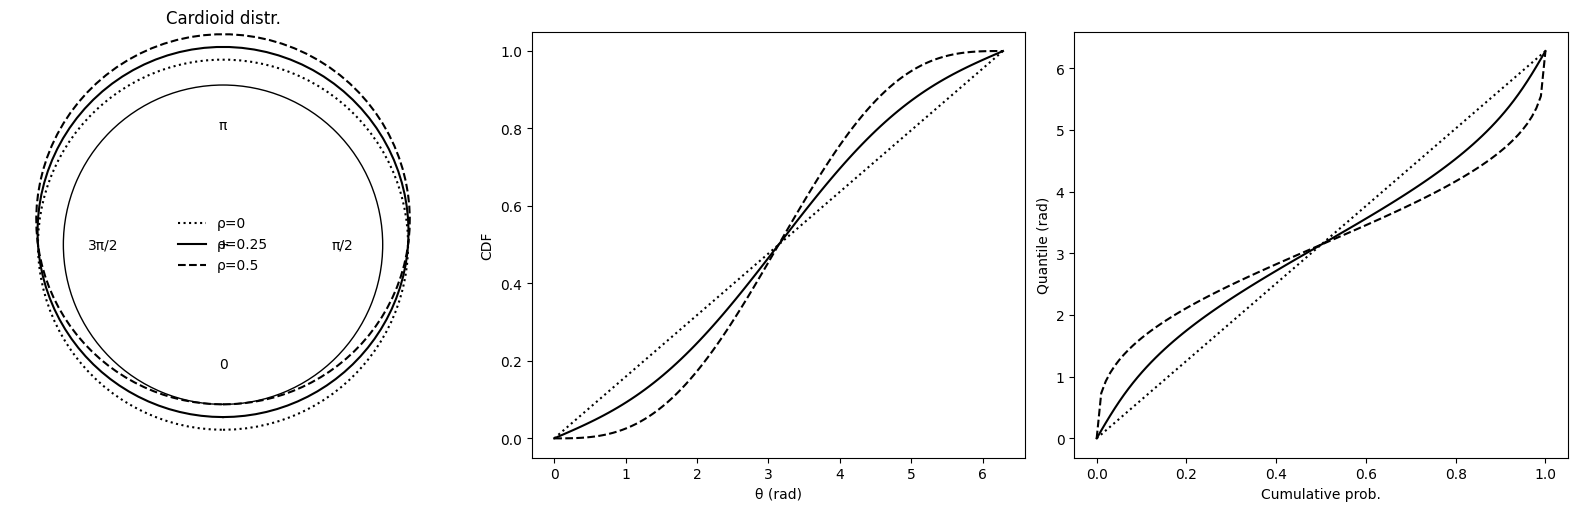

In [4]:
from pycircstat2.distributions import cardioid

n = 100
x = np.linspace(0, 2 * np.pi, n)
mu = np.pi

fig, ax = plt.subplot_mosaic(
    "abc",
    figsize=(16, 5),
    per_subplot_kw={"a": {"projection": "polar"}},
    layout="constrained",
)

ax["a"].plot(
    x,
    cardioid.pdf(x, rho=0.0, mu=mu) + 1,
    linestyle=":",
    color="black",
    label="ρ=0",
)

ax["a"].plot(
    x,
    cardioid.pdf(x, rho=0.25, mu=mu) + 1,
    linestyle="-",
    color="black",
    label="ρ=0.25",
)
ax["a"].plot(
    x, cardioid.pdf(x, rho=0.5, mu=mu) + 1, linestyle="--", color="black", label="ρ=0.5"
)


rtick = [0, 1]
ax["a"].set_theta_zero_location("S")
ax["a"].spines["polar"].set_visible(False)
ax["a"].set_rgrids(rtick, ["" for _ in range(len(rtick))], fontsize=16)
gridlines = ax["a"].yaxis.get_gridlines()
gridlines[-1].set_color("k")
gridlines[-1].set_linewidth(1)

# position_major = np.arange(0, 2 * np.pi, 2 * np.pi / 4)
position_major = []
ax["a"].xaxis.set_major_locator(ticker.FixedLocator(position_major))

ax["a"].text(
    x=0,
    y=0,
    s="+",
    ha="center",
    va="center",
    color="black",
)
labels = ["0", "π/2", "π", "3π/2"]
for i, angle in enumerate([0, np.pi / 2, np.pi, 3 * np.pi / 2]):
    ax["a"].text(x=angle, y=0.75, s=labels[i], ha="center", va="center", color="black")

ax["a"].legend(frameon=False)
ax["a"].set_title("Cardioid distr.")


ax["b"].plot(x, cardioid.cdf(x, rho=0.25, mu=mu), linestyle="-", color="black")
ax["b"].plot(x, cardioid.cdf(x, rho=0.5, mu=mu), linestyle="--", color="black")
ax["b"].plot(x, cardioid.cdf(x, rho=0.0, mu=mu), linestyle=":", color="black")
ax["b"].set_xlabel("θ (rad)")
ax["b"].set_ylabel("CDF")

p = np.linspace(1e-16, 1 - 1e-16, 100)
ax["c"].plot(p, cardioid.ppf(p, rho=0.25, mu=mu), linestyle="-", color="black")
ax["c"].plot(p, cardioid.ppf(p, rho=0.5, mu=mu), linestyle="--", color="black")
ax["c"].plot(p, cardioid.ppf(p, rho=0.0, mu=mu), linestyle=":", color="black")
ax["c"].set_xlabel("Cumulative prob.")
ax["c"].set_ylabel("Quantile (rad)")

fig.savefig("../docs/docs/images/circ-mod-cardioid.png")

### Cartwright Distribution

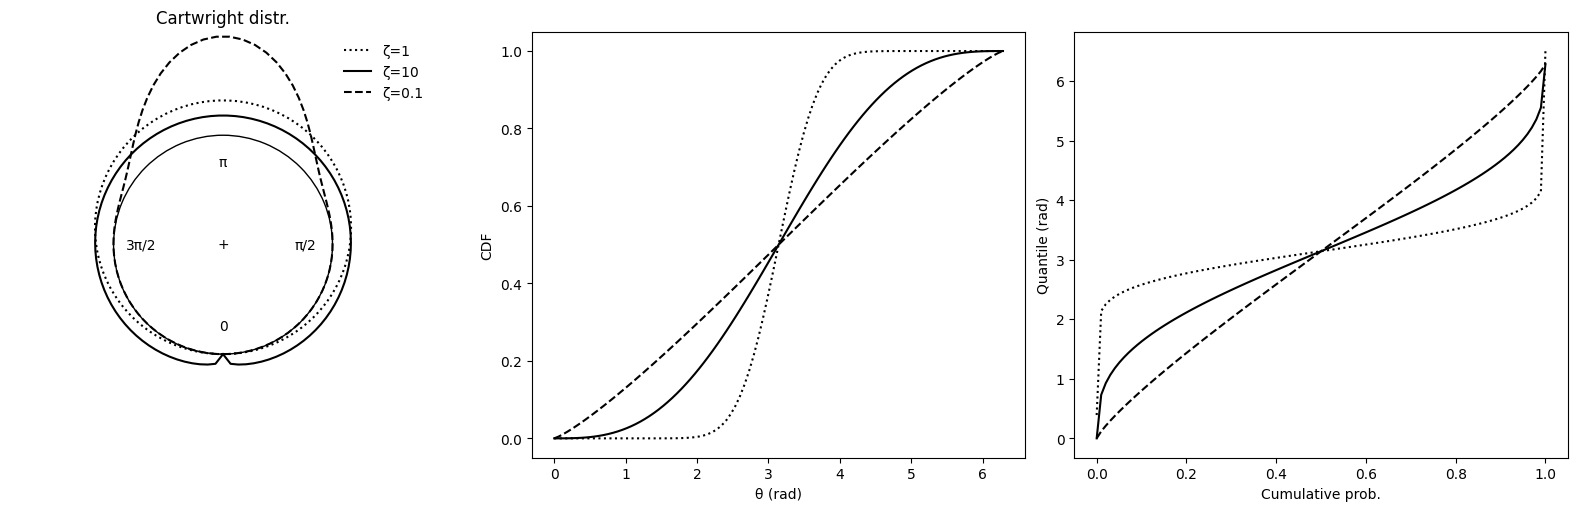

In [5]:
from pycircstat2.distributions import cartwright

n = 100
x = np.linspace(0, 2 * np.pi, n)
mu = np.pi

fig, ax = plt.subplot_mosaic(
    "abc",
    figsize=(16, 5),
    per_subplot_kw={"a": {"projection": "polar"}},
    layout="constrained",
)

ax["a"].plot(
    x,
    cartwright.pdf(x, zeta=1, mu=mu) + 1,
    linestyle=":",
    color="black",
    label="ζ=1",
)

ax["a"].plot(
    x,
    cartwright.pdf(x, zeta=10, mu=mu) + 1,
    linestyle="-",
    color="black",
    label="ζ=10",
)
ax["a"].plot(
    x,
    cartwright.pdf(x, zeta=0.1, mu=mu) + 1,
    linestyle="--",
    color="black",
    label="ζ=0.1",
)


rtick = [0, 1]
ax["a"].set_theta_zero_location("S")
ax["a"].spines["polar"].set_visible(False)
ax["a"].set_rgrids(rtick, ["" for _ in range(len(rtick))], fontsize=16)
gridlines = ax["a"].yaxis.get_gridlines()
gridlines[-1].set_color("k")
gridlines[-1].set_linewidth(1)

# position_major = np.arange(0, 2 * np.pi, 2 * np.pi / 4)
position_major = []
ax["a"].xaxis.set_major_locator(ticker.FixedLocator(position_major))

ax["a"].text(
    x=0,
    y=0,
    s="+",
    ha="center",
    va="center",
    color="black",
)
labels = ["0", "π/2", "π", "3π/2"]
for i, angle in enumerate([0, np.pi / 2, np.pi, 3 * np.pi / 2]):
    ax["a"].text(x=angle, y=0.75, s=labels[i], ha="center", va="center", color="black")

ax["a"].legend(frameon=False)
ax["a"].set_title("Cartwright distr.")


ax["b"].plot(x, cartwright.cdf(x, zeta=1, mu=mu), linestyle="-", color="black")
ax["b"].plot(x, cartwright.cdf(x, zeta=10, mu=mu), linestyle="--", color="black")
ax["b"].plot(x, cartwright.cdf(x, zeta=0.1, mu=mu), linestyle=":", color="black")
ax["b"].set_xlabel("θ (rad)")
ax["b"].set_ylabel("CDF")

p = np.linspace(1e-16, 1 - 1e-16, 100)
ax["c"].plot(p, cartwright.ppf(p, zeta=1, mu=mu), linestyle="-", color="black")
ax["c"].plot(p, cartwright.ppf(p, zeta=10, mu=mu), linestyle="--", color="black")
ax["c"].plot(p, cartwright.ppf(p, zeta=0.1, mu=mu), linestyle=":", color="black")
ax["c"].set_xlabel("Cumulative prob.")
ax["c"].set_ylabel("Quantile (rad)")

fig.savefig("../docs/docs/images/circ-mod-cartwright.png")

### Wrapped Normal Distribution

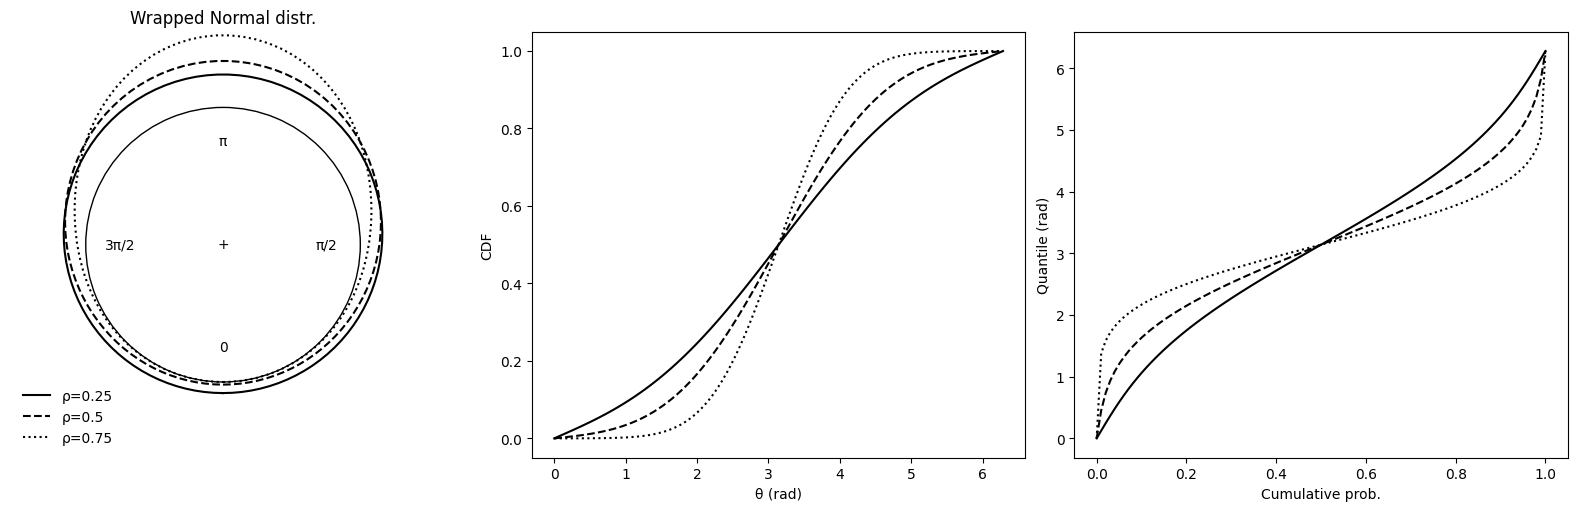

In [6]:
from pycircstat2.distributions import wrapnorm

n = 100
x = np.linspace(0, 2 * np.pi, n)
mu = np.pi

fig, ax = plt.subplot_mosaic(
    "abc",
    figsize=(16, 5),
    per_subplot_kw={"a": {"projection": "polar"}},
    layout="constrained",
)

ax["a"].plot(
    x,
    wrapnorm.pdf(x, rho=0.25, mu=mu) + 1,
    linestyle="-",
    color="black",
    label="ρ=0.25",
)
ax["a"].plot(
    x, wrapnorm.pdf(x, rho=0.5, mu=mu) + 1, linestyle="--", color="black", label="ρ=0.5"
)
ax["a"].plot(
    x,
    wrapnorm.pdf(x, rho=0.75, mu=mu) + 1,
    linestyle=":",
    color="black",
    label="ρ=0.75",
)

rtick = [0, 1]
ax["a"].set_theta_zero_location("S")
ax["a"].spines["polar"].set_visible(False)
ax["a"].set_rgrids(rtick, ["" for _ in range(len(rtick))], fontsize=16)
gridlines = ax["a"].yaxis.get_gridlines()
gridlines[-1].set_color("k")
gridlines[-1].set_linewidth(1)

# position_major = np.arange(0, 2 * np.pi, 2 * np.pi / 4)
position_major = []
ax["a"].xaxis.set_major_locator(ticker.FixedLocator(position_major))

ax["a"].text(
    x=0,
    y=0,
    s="+",
    ha="center",
    va="center",
    color="black",
)
labels = ["0", "π/2", "π", "3π/2"]
for i, angle in enumerate([0, np.pi / 2, np.pi, 3 * np.pi / 2]):
    ax["a"].text(x=angle, y=0.75, s=labels[i], ha="center", va="center", color="black")

ax["a"].legend(frameon=False)
ax["a"].set_title("Wrapped Normal distr.")


ax["b"].plot(x, wrapnorm.cdf(x, rho=0.25, mu=mu), linestyle="-", color="black")
ax["b"].plot(x, wrapnorm.cdf(x, rho=0.5, mu=mu), linestyle="--", color="black")
ax["b"].plot(x, wrapnorm.cdf(x, rho=0.75, mu=mu), linestyle=":", color="black")
ax["b"].set_xlabel("θ (rad)")
ax["b"].set_ylabel("CDF")

p = np.linspace(1e-16, 1 - 1e-16, 100)
ax["c"].plot(p, wrapnorm.ppf(p, rho=0.25, mu=mu), linestyle="-", color="black")
ax["c"].plot(p, wrapnorm.ppf(p, rho=0.5, mu=mu), linestyle="--", color="black")
ax["c"].plot(p, wrapnorm.ppf(p, rho=0.75, mu=mu), linestyle=":", color="black")
ax["c"].set_xlabel("Cumulative prob.")
ax["c"].set_ylabel("Quantile (rad)")

fig.savefig("../docs/docs/images/circ-mod-wrapnorm.png")

### Wrapped Cauchy Distribution

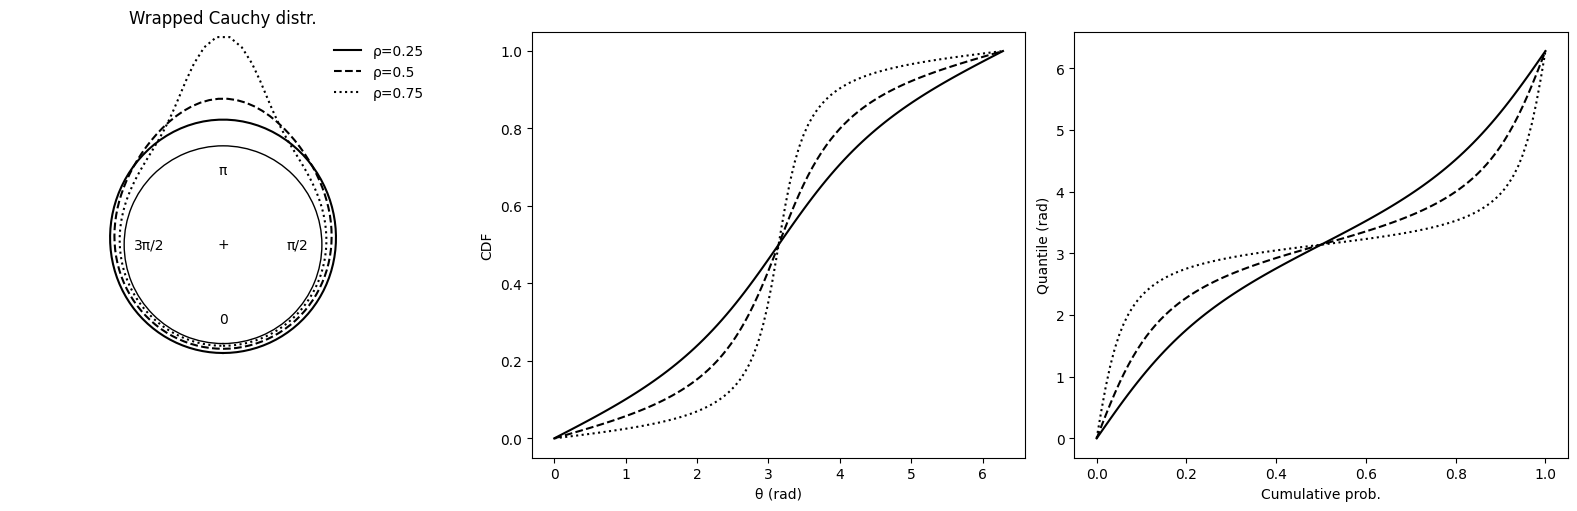

In [7]:
from pycircstat2.distributions import wrapcauchy

n = 100
x = np.linspace(0, 2 * np.pi, n)
mu = np.pi

fig, ax = plt.subplot_mosaic(
    "abc",
    figsize=(16, 5),
    per_subplot_kw={"a": {"projection": "polar"}},
    layout="constrained",
)

ax["a"].plot(
    x,
    wrapcauchy.pdf(x, rho=0.25, mu=mu) + 1,
    linestyle="-",
    color="black",
    label="ρ=0.25",
)
ax["a"].plot(
    x,
    wrapcauchy.pdf(x, rho=0.5, mu=mu) + 1,
    linestyle="--",
    color="black",
    label="ρ=0.5",
)
ax["a"].plot(
    x,
    wrapcauchy.pdf(x, rho=0.75, mu=mu) + 1,
    linestyle=":",
    color="black",
    label="ρ=0.75",
)

rtick = [0, 1]
ax["a"].set_theta_zero_location("S")
ax["a"].spines["polar"].set_visible(False)
ax["a"].set_rgrids(rtick, ["" for _ in range(len(rtick))], fontsize=16)
gridlines = ax["a"].yaxis.get_gridlines()
gridlines[-1].set_color("k")
gridlines[-1].set_linewidth(1)

position_major = []
ax["a"].xaxis.set_major_locator(ticker.FixedLocator(position_major))

ax["a"].text(
    x=0,
    y=0,
    s="+",
    ha="center",
    va="center",
    color="black",
)
labels = ["0", "π/2", "π", "3π/2"]
for i, angle in enumerate([0, np.pi / 2, np.pi, 3 * np.pi / 2]):
    ax["a"].text(x=angle, y=0.75, s=labels[i], ha="center", va="center", color="black")

ax["a"].legend(frameon=False)
ax["a"].set_title("Wrapped Cauchy distr.")


ax["b"].plot(x, wrapcauchy.cdf(x, rho=0.25, mu=mu), linestyle="-", color="black")
ax["b"].plot(x, wrapcauchy.cdf(x, rho=0.5, mu=mu), linestyle="--", color="black")
ax["b"].plot(x, wrapcauchy.cdf(x, rho=0.75, mu=mu), linestyle=":", color="black")
ax["b"].set_xlabel("θ (rad)")
ax["b"].set_ylabel("CDF")

p = np.linspace(1e-16, 1 - 1e-16, 100)
ax["c"].plot(p, wrapcauchy.ppf(p, rho=0.25, mu=mu), linestyle="-", color="black")
ax["c"].plot(p, wrapcauchy.ppf(p, rho=0.5, mu=mu), linestyle="--", color="black")
ax["c"].plot(p, wrapcauchy.ppf(p, rho=0.75, mu=mu), linestyle=":", color="black")
ax["c"].set_xlabel("Cumulative prob.")
ax["c"].set_ylabel("Quantile (rad)")

fig.savefig("../docs/docs/images/circ-mod-wrapcauchy.png")

### Von Mises Distribution

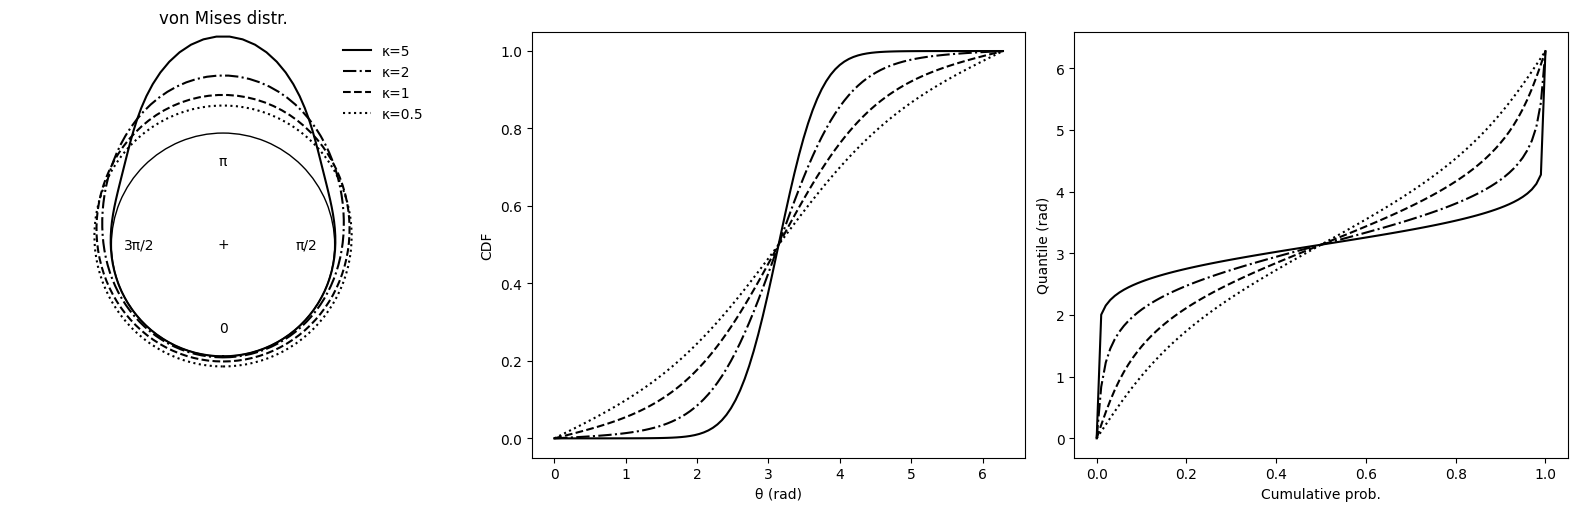

In [8]:
from pycircstat2.distributions import vonmises

n = 100
x = np.linspace(0, 2 * np.pi, n)
mu = np.pi

fig, ax = plt.subplot_mosaic(
    "abc",
    figsize=(16, 5),
    per_subplot_kw={"a": {"projection": "polar"}},
    layout="constrained",
)

ax["a"].plot(
    x, vonmises.pdf(x, kappa=5, mu=mu) + 1, linestyle="-", color="black", label="κ=5"
)
ax["a"].plot(
    x, vonmises.pdf(x, kappa=2, mu=mu) + 1, linestyle="-.", color="black", label="κ=2"
)
ax["a"].plot(
    x, vonmises.pdf(x, kappa=1, mu=mu) + 1, linestyle="--", color="black", label="κ=1"
)
ax["a"].plot(
    x,
    vonmises.pdf(x, kappa=0.5, mu=mu) + 1,
    linestyle=":",
    color="black",
    label="κ=0.5",
)

rtick = [0, 1]
ax["a"].set_theta_zero_location("S")
ax["a"].spines["polar"].set_visible(False)
ax["a"].set_rgrids(rtick, ["" for _ in range(len(rtick))], fontsize=16)
gridlines = ax["a"].yaxis.get_gridlines()
gridlines[-1].set_color("k")
gridlines[-1].set_linewidth(1)

position_major = []
ax["a"].xaxis.set_major_locator(ticker.FixedLocator(position_major))

ax["a"].text(
    x=0,
    y=0,
    s="+",
    ha="center",
    va="center",
    color="black",
)
labels = ["0", "π/2", "π", "3π/2"]
for i, angle in enumerate([0, np.pi / 2, np.pi, 3 * np.pi / 2]):
    ax["a"].text(x=angle, y=0.75, s=labels[i], ha="center", va="center", color="black")

ax["a"].legend(frameon=False)
ax["a"].set_title("von Mises distr.")

ax["b"].plot(x, vonmises.cdf(x, kappa=5, mu=mu), linestyle="-", color="black")
ax["b"].plot(x, vonmises.cdf(x, kappa=2, mu=mu), linestyle="-.", color="black")
ax["b"].plot(x, vonmises.cdf(x, kappa=1, mu=mu), linestyle="--", color="black")
ax["b"].plot(x, vonmises.cdf(x, kappa=0.5, mu=mu), linestyle=":", color="black")
ax["b"].set_xlabel("θ (rad)")
ax["b"].set_ylabel("CDF")

p = np.linspace(1e-16, 1 - 1e-16, n)
ax["c"].plot(p, vonmises.ppf(p, kappa=5, mu=mu), linestyle="-", color="black")
ax["c"].plot(p, vonmises.ppf(p, kappa=2, mu=mu), linestyle="-.", color="black")
ax["c"].plot(p, vonmises.ppf(p, kappa=1, mu=mu), linestyle="--", color="black")
ax["c"].plot(p, vonmises.ppf(p, kappa=0.5, mu=mu), linestyle=":", color="black")
ax["c"].set_xlabel("Cumulative prob.")
ax["c"].set_ylabel("Quantile (rad)")

fig.savefig("../docs/docs/images/circ-mod-vonmises.png")

### Jones-Pewsey Distribution

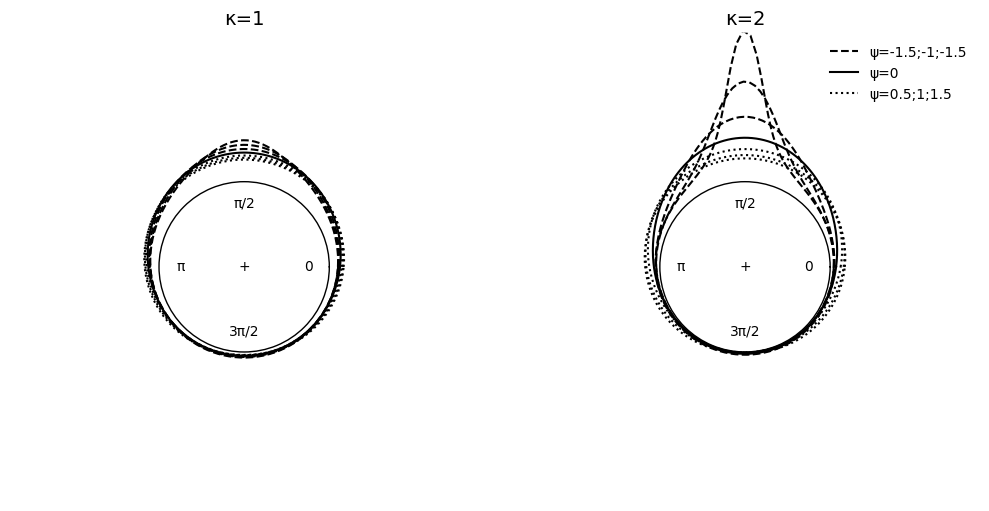

In [9]:
from pycircstat2.distributions import jonespewsey

n = 200
x = np.linspace(0, 2 * np.pi, n)
mu = np.pi / 2

fig, ax = plt.subplots(
    1, 2, figsize=(10, 5), subplot_kw={"projection": "polar"}, layout="constrained"
)

ax[0].plot(
    x,
    jonespewsey.pdf(x, kappa=1, psi=-3 / 2, mu=mu) + 1,
    linestyle="--",
    color="black",
    label="ψ=-1.5;-1;-2",
)
ax[0].plot(
    x, jonespewsey.pdf(x, kappa=1, psi=-1, mu=mu) + 1, linestyle="--", color="black"
)
ax[0].plot(
    x, jonespewsey.pdf(x, kappa=1, psi=-1 / 2, mu=mu) + 1, linestyle="--", color="black"
)

ax[0].plot(
    x,
    jonespewsey.pdf(x, kappa=1, psi=0, mu=mu) + 1,
    linestyle="-",
    color="black",
    label="ψ=0",
)

ax[0].plot(
    x,
    jonespewsey.pdf(x, kappa=1, psi=1 / 2, mu=mu) + 1,
    linestyle=":",
    color="black",
    label="ψ=0.5;1;1.5",
)
ax[0].plot(
    x, jonespewsey.pdf(x, kappa=1, psi=1, mu=mu) + 1, linestyle=":", color="black"
)
ax[0].plot(
    x, jonespewsey.pdf(x, kappa=1, psi=3 / 2, mu=mu) + 1, linestyle=":", color="black"
)


ax[1].plot(
    x,
    jonespewsey.pdf(x, kappa=2, psi=-3 / 2, mu=mu) + 1,
    linestyle="--",
    color="black",
    label="ψ=-1.5;-1;-1.5",
)
ax[1].plot(
    x, jonespewsey.pdf(x, kappa=2, psi=-1, mu=mu) + 1, linestyle="--", color="black"
)
ax[1].plot(
    x, jonespewsey.pdf(x, kappa=2, psi=-1 / 2, mu=mu) + 1, linestyle="--", color="black"
)

ax[1].plot(
    x,
    jonespewsey.pdf(x, kappa=2, psi=0, mu=mu) + 1,
    linestyle="-",
    color="black",
    label="ψ=0",
)

ax[1].plot(
    x,
    jonespewsey.pdf(x, kappa=2, psi=1 / 2, mu=mu) + 1,
    linestyle=":",
    color="black",
    label="ψ=0.5;1;1.5",
)
ax[1].plot(
    x, jonespewsey.pdf(x, kappa=2, psi=1, mu=mu) + 1, linestyle=":", color="black"
)
ax[1].plot(
    x, jonespewsey.pdf(x, kappa=2, psi=3 / 2, mu=mu) + 1, linestyle=":", color="black"
)

ks = [1, 2]
for j in range(2):
    rtick = [0, 1]
    ax[j].spines["polar"].set_visible(False)
    ax[j].set_rgrids(rtick, ["" for _ in range(len(rtick))], fontsize=16)
    gridlines = ax[j].yaxis.get_gridlines()
    gridlines[-1].set_color("k")
    gridlines[-1].set_linewidth(1)

    position_major = []
    ax[j].xaxis.set_major_locator(ticker.FixedLocator(position_major))

    ax[j].text(
        x=0,
        y=0,
        s="+",
        ha="center",
        va="center",
        color="black",
    )
    labels = ["0", "π/2", "π", "3π/2"]
    for i, angle in enumerate([0, np.pi / 2, np.pi, 3 * np.pi / 2]):
        ax[j].text(
            x=angle,
            y=0.75,
            s=labels[i],
            ha="center",
            va="center",
            color="black",
        )

    ax[j].set_ylim(0, 2.75)
    ax[j].set_title(f"κ={ks[j]}", fontsize=14)

    if j == 1:
        ax[j].legend(frameon=False)

fig.savefig("../docs/docs/images/circ-mod-jonespewsey.png")

### Flat-topped von Mises Distribution

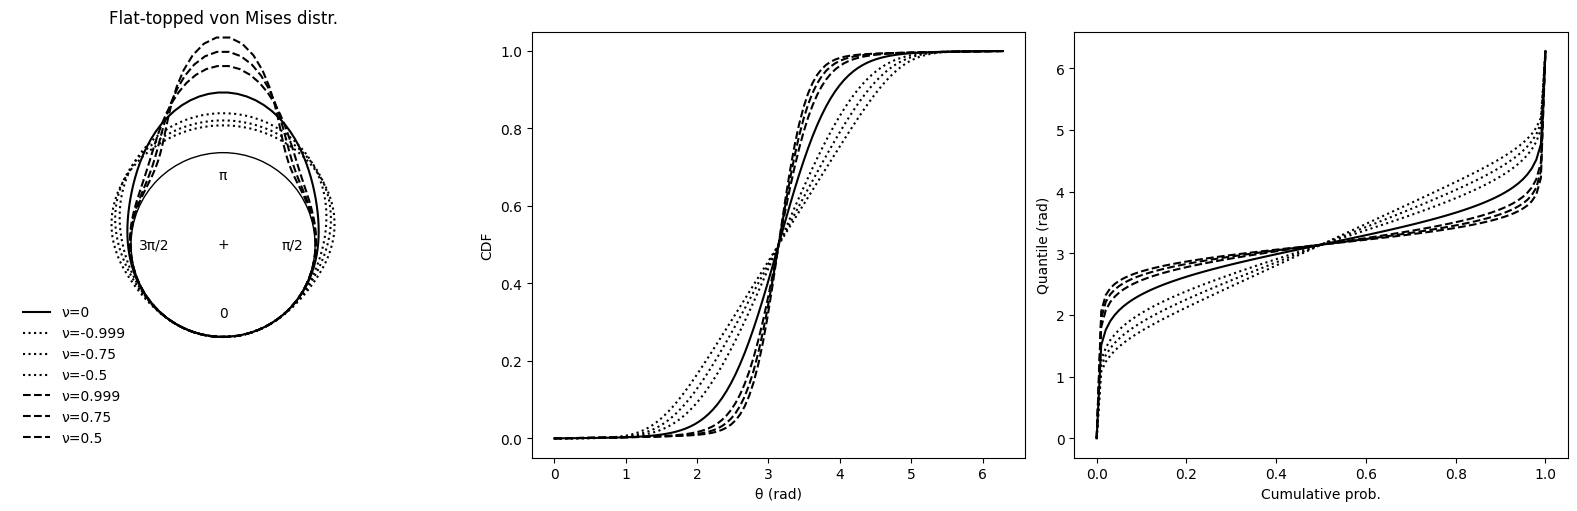

In [10]:
from pycircstat2.distributions import vonmises_ext

n = 100
x = np.linspace(0, 2 * np.pi, n)
mu = np.pi
kappa = 3
fig, ax = plt.subplot_mosaic(
    "abc",
    figsize=(16, 5),
    per_subplot_kw={"a": {"projection": "polar"}},
    layout="constrained",
)

ax["a"].plot(
    x,
    vonmises_ext.pdf(x, nu=0, kappa=kappa, mu=mu) + 1,
    linestyle="-",
    color="black",
    label="ν=0",
)
ax["a"].plot(
    x,
    vonmises_ext.pdf(x, nu=-0.999, kappa=kappa, mu=mu) + 1,
    linestyle=":",
    color="black",
    label="ν=-0.999",
)
ax["a"].plot(
    x,
    vonmises_ext.pdf(x, nu=-0.75, kappa=kappa, mu=mu) + 1,
    linestyle=":",
    color="black",
    label="ν=-0.75",
)
ax["a"].plot(
    x,
    vonmises_ext.pdf(x, nu=-0.5, kappa=kappa, mu=mu) + 1,
    linestyle=":",
    color="black",
    label="ν=-0.5",
)

ax["a"].plot(
    x,
    vonmises_ext.pdf(x, nu=0.999, kappa=kappa, mu=mu) + 1,
    linestyle="--",
    color="black",
    label="ν=0.999",
)
ax["a"].plot(
    x,
    vonmises_ext.pdf(x, nu=0.75, kappa=kappa, mu=mu) + 1,
    linestyle="--",
    color="black",
    label="ν=0.75",
)
ax["a"].plot(
    x,
    vonmises_ext.pdf(x, nu=0.5, kappa=kappa, mu=mu) + 1,
    linestyle="--",
    color="black",
    label="ν=0.5",
)

rtick = [0, 1]
ax["a"].set_theta_zero_location("S")
ax["a"].spines["polar"].set_visible(False)
ax["a"].set_rgrids(rtick, ["" for _ in range(len(rtick))], fontsize=16)
gridlines = ax["a"].yaxis.get_gridlines()
gridlines[-1].set_color("k")
gridlines[-1].set_linewidth(1)

position_major = []
ax["a"].xaxis.set_major_locator(ticker.FixedLocator(position_major))

ax["a"].text(
    x=0,
    y=0,
    s="+",
    ha="center",
    va="center",
    color="black",
)
labels = ["0", "π/2", "π", "3π/2"]
for i, angle in enumerate([0, np.pi / 2, np.pi, 3 * np.pi / 2]):
    ax["a"].text(x=angle, y=0.75, s=labels[i], ha="center", va="center", color="black")

ax["a"].legend(frameon=False)
ax["a"].set_title("Flat-topped von Mises distr.")

ax["b"].plot(
    x, vonmises_ext.cdf(x, nu=0, kappa=kappa, mu=mu), linestyle="-", color="black"
)
ax["b"].plot(
    x, vonmises_ext.cdf(x, nu=-0.999, kappa=kappa, mu=mu), linestyle=":", color="black"
)
ax["b"].plot(
    x, vonmises_ext.cdf(x, nu=-0.75, kappa=kappa, mu=mu), linestyle=":", color="black"
)
ax["b"].plot(
    x, vonmises_ext.cdf(x, nu=-0.5, kappa=kappa, mu=mu), linestyle=":", color="black"
)

ax["b"].plot(
    x, vonmises_ext.cdf(x, nu=0.999, kappa=kappa, mu=mu), linestyle="--", color="black"
)
ax["b"].plot(
    x, vonmises_ext.cdf(x, nu=0.75, kappa=kappa, mu=mu), linestyle="--", color="black"
)
ax["b"].plot(
    x, vonmises_ext.cdf(x, nu=0.5, kappa=kappa, mu=mu), linestyle="--", color="black"
)

ax["b"].set_xlabel("θ (rad)")
ax["b"].set_ylabel("CDF")

p = np.linspace(1e-16, 1 - 1e-16, n)
ax["c"].plot(
    p, vonmises_ext.ppf(p, nu=0, kappa=kappa, mu=mu), linestyle="-", color="black"
)
ax["c"].plot(
    p, vonmises_ext.ppf(p, nu=-0.999, kappa=kappa, mu=mu), linestyle=":", color="black"
)
ax["c"].plot(
    p, vonmises_ext.ppf(p, nu=-0.75, kappa=kappa, mu=mu), linestyle=":", color="black"
)
ax["c"].plot(
    p, vonmises_ext.ppf(p, nu=-0.5, kappa=kappa, mu=mu), linestyle=":", color="black"
)

ax["c"].plot(
    p, vonmises_ext.ppf(p, nu=0.999, kappa=kappa, mu=mu), linestyle="--", color="black"
)
ax["c"].plot(
    p, vonmises_ext.ppf(p, nu=0.75, kappa=kappa, mu=mu), linestyle="--", color="black"
)
ax["c"].plot(
    p, vonmises_ext.ppf(p, nu=0.5, kappa=kappa, mu=mu), linestyle="--", color="black"
)


ax["c"].set_xlabel("Cumulative prob.")
ax["c"].set_ylabel("Quantile (rad)")

fig.savefig("../docs/docs/images/circ-mod-vonmises-ext.png")

## Asymmetric distributions

### Sine-Skewed Jones-Pewsey Distribution

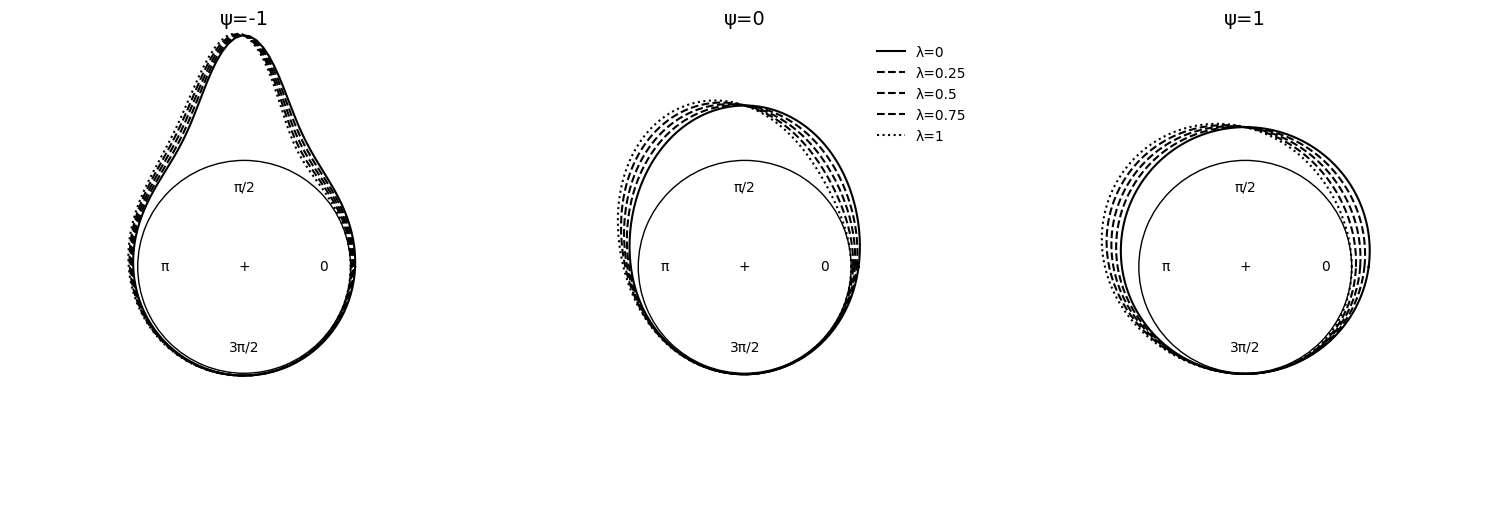

In [11]:
from pycircstat2.distributions import jonespewsey_sineskewed

n = 200
x = np.linspace(0, 2 * np.pi, n)
mu = np.pi / 2

fig, ax = plt.subplot_mosaic(
    mosaic="abc",
    figsize=(15, 5),
    subplot_kw={"projection": "polar"},
    layout="constrained",
)

ax["a"].plot(
    x,
    jonespewsey_sineskewed.pdf(x, kappa=2, psi=-1, lmbd=0, xi=mu) + 1,
    linestyle="-",
    color="black",
)
ax["a"].plot(
    x,
    jonespewsey_sineskewed.pdf(x, kappa=2, psi=-1, lmbd=0.25, xi=mu) + 1,
    linestyle="--",
    color="black",
)
ax["a"].plot(
    x,
    jonespewsey_sineskewed.pdf(x, kappa=2, psi=-1, lmbd=0.5, xi=mu) + 1,
    linestyle="--",
    color="black",
)
ax["a"].plot(
    x,
    jonespewsey_sineskewed.pdf(x, kappa=2, psi=-1, lmbd=0.75, xi=mu) + 1,
    linestyle="--",
    color="black",
)
ax["a"].plot(
    x,
    jonespewsey_sineskewed.pdf(x, kappa=2, psi=-1, lmbd=1, xi=mu) + 1,
    linestyle=":",
    color="black",
)

####


ax["b"].plot(
    x,
    jonespewsey_sineskewed.pdf(x, kappa=2, psi=0, lmbd=0, xi=mu) + 1,
    linestyle="-",
    color="black",
    label="λ=0",
)
ax["b"].plot(
    x,
    jonespewsey_sineskewed.pdf(x, kappa=2, psi=0, lmbd=0.25, xi=mu) + 1,
    linestyle="--",
    color="black",
    label="λ=0.25",
)
ax["b"].plot(
    x,
    jonespewsey_sineskewed.pdf(x, kappa=2, psi=0, lmbd=0.5, xi=mu) + 1,
    linestyle="--",
    color="black",
    label="λ=0.5",
)
ax["b"].plot(
    x,
    jonespewsey_sineskewed.pdf(x, kappa=2, psi=0, lmbd=0.75, xi=mu) + 1,
    linestyle="--",
    color="black",
    label="λ=0.75",
)
ax["b"].plot(
    x,
    jonespewsey_sineskewed.pdf(x, kappa=2, psi=0, lmbd=1, xi=mu) + 1,
    linestyle=":",
    color="black",
    label="λ=1",
)

####

ax["c"].plot(
    x,
    jonespewsey_sineskewed.pdf(x, kappa=2, psi=1, lmbd=0, xi=mu) + 1,
    linestyle="-",
    color="black",
)
ax["c"].plot(
    x,
    jonespewsey_sineskewed.pdf(x, kappa=2, psi=1, lmbd=0.25, xi=mu) + 1,
    linestyle="--",
    color="black",
)
ax["c"].plot(
    x,
    jonespewsey_sineskewed.pdf(x, kappa=2, psi=1, lmbd=0.5, xi=mu) + 1,
    linestyle="--",
    color="black",
)
ax["c"].plot(
    x,
    jonespewsey_sineskewed.pdf(x, kappa=2, psi=1, lmbd=0.75, xi=mu) + 1,
    linestyle="--",
    color="black",
)
ax["c"].plot(
    x,
    jonespewsey_sineskewed.pdf(x, kappa=2, psi=1, lmbd=1, xi=mu) + 1,
    linestyle=":",
    color="black",
)

psis = [-1, 0, 1]
for j, s in enumerate(["a", "b", "c"]):
    rtick = [0, 1]
    ax[s].spines["polar"].set_visible(False)
    ax[s].set_rgrids(rtick, ["" for _ in range(len(rtick))], fontsize=16)
    gridlines = ax[s].yaxis.get_gridlines()
    gridlines[-1].set_color("k")
    gridlines[-1].set_linewidth(1)

    position_major = []
    ax[s].xaxis.set_major_locator(ticker.FixedLocator(position_major))

    ax[s].text(
        x=0,
        y=0,
        s="+",
        ha="center",
        va="center",
        color="black",
    )
    labels = ["0", "π/2", "π", "3π/2"]
    for i, angle in enumerate([0, np.pi / 2, np.pi, 3 * np.pi / 2]):
        ax[s].text(
            x=angle,
            y=0.75,
            s=labels[i],
            ha="center",
            va="center",
            color="black",
        )

    ax[s].set_ylim(0, 2.2)
    ax[s].set_title(f"ψ={psis[j]}", fontsize=14)

    if j == 1:
        ax[s].legend(frameon=False)

fig.savefig("../docs/docs/images/circ-mod-jonespewsey-sineskewed.png")

### Asymmetric Extended Jones-Pewsey Distribution

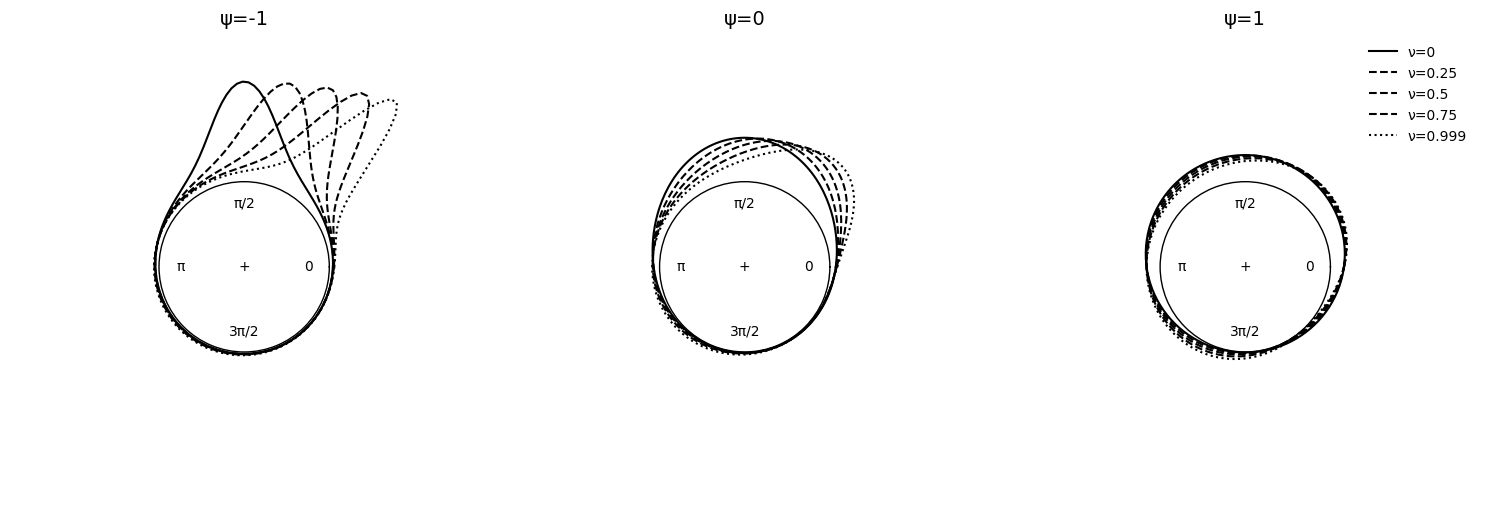

In [12]:
from pycircstat2.distributions import jonespewsey_asymext

n = 200
x = np.linspace(0, 2 * np.pi, n)
mu = np.pi / 2

fig, ax = plt.subplot_mosaic(
    "abc", figsize=(15, 5), subplot_kw={"projection": "polar"}, layout="constrained"
)

### left

ax["a"].plot(
    x,
    jonespewsey_asymext.pdf(x, kappa=2, psi=-1, nu=0, xi=mu) + 1,
    linestyle="-",
    color="black",
)
ax["a"].plot(
    x,
    jonespewsey_asymext.pdf(x, kappa=2, psi=-1, nu=0.25, xi=mu) + 1,
    linestyle="--",
    color="black",
)
ax["a"].plot(
    x,
    jonespewsey_asymext.pdf(x, kappa=2, psi=-1, nu=0.5, xi=mu) + 1,
    linestyle="--",
    color="black",
)
ax["a"].plot(
    x,
    jonespewsey_asymext.pdf(x, kappa=2, psi=-1, nu=0.75, xi=mu) + 1,
    linestyle="--",
    color="black",
)
ax["a"].plot(
    x,
    jonespewsey_asymext.pdf(x, kappa=2, psi=-1, nu=0.999, xi=mu) + 1,
    linestyle=":",
    color="black",
)

#### mid

ax["b"].plot(
    x,
    jonespewsey_asymext.pdf(x, kappa=2, psi=0, nu=0, xi=mu) + 1,
    linestyle="-",
    color="black",
)
ax["b"].plot(
    x,
    jonespewsey_asymext.pdf(x, kappa=2, psi=0, nu=0.25, xi=mu) + 1,
    linestyle="--",
    color="black",
)
ax["b"].plot(
    x,
    jonespewsey_asymext.pdf(x, kappa=2, psi=0, nu=0.5, xi=mu) + 1,
    linestyle="--",
    color="black",
)
ax["b"].plot(
    x,
    jonespewsey_asymext.pdf(x, kappa=2, psi=0, nu=0.75, xi=mu) + 1,
    linestyle="--",
    color="black",
)
ax["b"].plot(
    x,
    jonespewsey_asymext.pdf(x, kappa=2, psi=0, nu=0.999, xi=mu) + 1,
    linestyle=":",
    color="black",
)

#### right

ax["c"].plot(
    x,
    jonespewsey_asymext.pdf(x, kappa=2, psi=1, nu=0, xi=mu) + 1,
    linestyle="-",
    color="black",
    label="ν=0",
)
ax["c"].plot(
    x,
    jonespewsey_asymext.pdf(x, kappa=2, psi=1, nu=0.25, xi=mu) + 1,
    linestyle="--",
    color="black",
    label="ν=0.25",
)
ax["c"].plot(
    x,
    jonespewsey_asymext.pdf(x, kappa=2, psi=1, nu=0.5, xi=mu) + 1,
    linestyle="--",
    color="black",
    label="ν=0.5",
)
ax["c"].plot(
    x,
    jonespewsey_asymext.pdf(x, kappa=2, psi=1, nu=0.75, xi=mu) + 1,
    linestyle="--",
    color="black",
    label="ν=0.75",
)
ax["c"].plot(
    x,
    jonespewsey_asymext.pdf(x, kappa=2, psi=1, nu=0.999, xi=mu) + 1,
    linestyle=":",
    color="black",
    label="ν=0.999",
)

psis = [-1, 0, 1]
for j, s in enumerate(["a", "b", "c"]):
    rtick = [0, 1]
    ax[s].spines["polar"].set_visible(False)
    ax[s].set_rgrids(rtick, ["" for _ in range(len(rtick))], fontsize=16)
    gridlines = ax[s].yaxis.get_gridlines()
    gridlines[-1].set_color("k")
    gridlines[-1].set_linewidth(1)

    position_major = []
    ax[s].xaxis.set_major_locator(ticker.FixedLocator(position_major))

    ax[s].text(
        x=0,
        y=0,
        s="+",
        ha="center",
        va="center",
        color="black",
    )
    labels = ["0", "π/2", "π", "3π/2"]
    for i, angle in enumerate([0, np.pi / 2, np.pi, 3 * np.pi / 2]):
        ax[s].text(
            x=angle,
            y=0.75,
            s=labels[i],
            ha="center",
            va="center",
            color="black",
        )

    ax[s].set_ylim(0, 2.75)
    ax[s].set_title(f"ψ={psis[j]}", fontsize=14)

    if j == 2:
        ax[s].legend(frameon=False)

fig.savefig("../docs/docs/images/circ-mod-jonespewsey-asymext.png")

### Inverse Batschelet Distribution

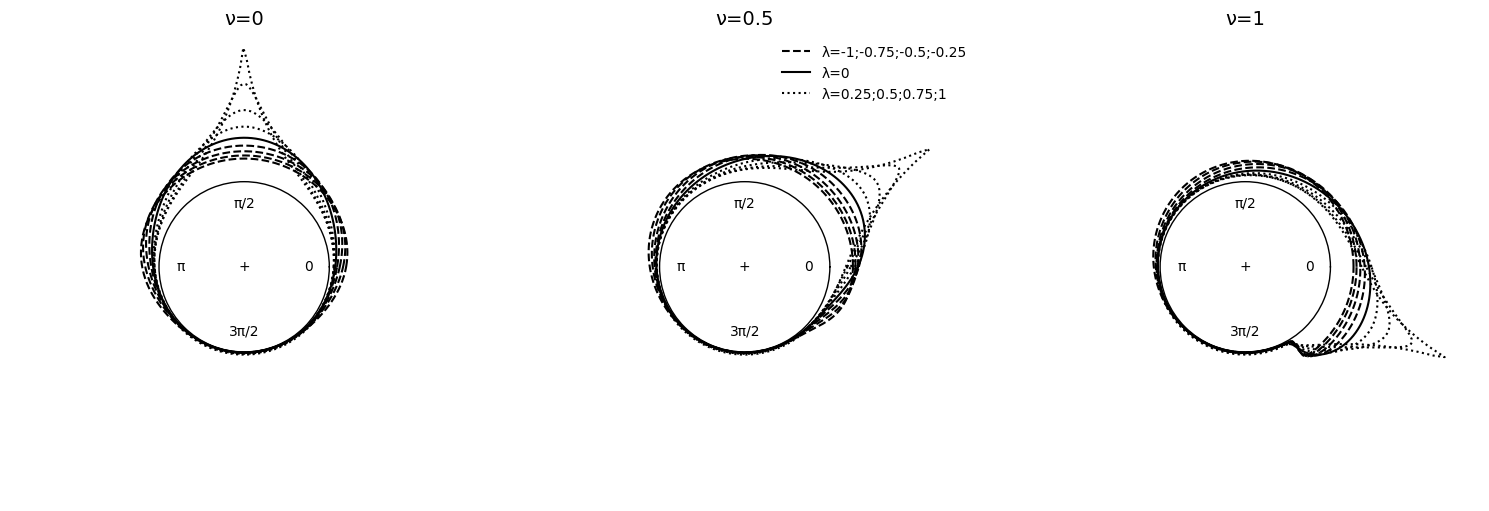

In [13]:
from pycircstat2.distributions import inverse_batschelet

n = 400
x = np.linspace(0, 2 * np.pi, n)
mu = np.pi / 2

fig, ax = plt.subplot_mosaic(
    "abc", figsize=(15, 5), subplot_kw={"projection": "polar"}, layout="constrained"
)

ax["a"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=0, lmbd=-1.0, xi=mu) + 1,
    linestyle="--",
    color="black",
)
ax["a"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=0, lmbd=-0.75, xi=mu) + 1,
    linestyle="--",
    color="black",
)
ax["a"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=0, lmbd=-0.5, xi=mu) + 1,
    linestyle="--",
    color="black",
)
ax["a"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=0, lmbd=-0.25, xi=mu) + 1,
    linestyle="--",
    color="black",
)

ax["a"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=0, lmbd=0, xi=mu) + 1,
    linestyle="-",
    color="black",
)

ax["a"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=0, lmbd=0.25, xi=mu) + 1,
    linestyle=":",
    color="black",
)
ax["a"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=0, lmbd=0.5, xi=mu) + 1,
    linestyle=":",
    color="black",
)
ax["a"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=0, lmbd=0.75, xi=mu) + 1,
    linestyle=":",
    color="black",
)
ax["a"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=0, lmbd=1, xi=mu) + 1,
    linestyle=":",
    color="black",
)

ax["b"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=0.5, lmbd=-1, xi=mu) + 1,
    linestyle="--",
    color="black",
    label="λ=-1;-0.75;-0.5;-0.25",
)
ax["b"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=0.5, lmbd=-0.75, xi=mu) + 1,
    linestyle="--",
    color="black",
)
ax["b"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=0.5, lmbd=-0.5, xi=mu) + 1,
    linestyle="--",
    color="black",
)
ax["b"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=0.5, lmbd=-0.25, xi=mu) + 1,
    linestyle="--",
    color="black",
)

ax["b"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=0.5, lmbd=0, xi=mu) + 1,
    linestyle="-",
    color="black",
    label="λ=0",
)

ax["b"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=0.5, lmbd=0.25, xi=mu) + 1,
    linestyle=":",
    color="black",
    label="λ=0.25;0.5;0.75;1",
)
ax["b"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=0.5, lmbd=0.5, xi=mu) + 1,
    linestyle=":",
    color="black",
)
ax["b"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=0.5, lmbd=0.75, xi=mu) + 1,
    linestyle=":",
    color="black",
)
ax["b"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=0.5, lmbd=1, xi=mu) + 1,
    linestyle=":",
    color="black",
)

ax["c"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=1, lmbd=-1, xi=mu) + 1,
    linestyle="--",
    color="black",
    label="λ=-1;-0.75;-1;-0.25",
)
ax["c"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=1, lmbd=-0.75, xi=mu) + 1,
    linestyle="--",
    color="black",
)
ax["c"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=1, lmbd=-0.5, xi=mu) + 1,
    linestyle="--",
    color="black",
)
ax["c"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=1, lmbd=-0.25, xi=mu) + 1,
    linestyle="--",
    color="black",
)

ax["c"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=1, lmbd=0, xi=mu) + 1,
    linestyle="-",
    color="black",
    label="λ=0",
)

ax["c"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=1, lmbd=0.25, xi=mu) + 1,
    linestyle=":",
    color="black",
    label="λ=0.25;1;0.75;1",
)
ax["c"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=1, lmbd=0.5, xi=mu) + 1,
    linestyle=":",
    color="black",
)
ax["c"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=1, lmbd=0.75, xi=mu) + 1,
    linestyle=":",
    color="black",
)
ax["c"].plot(
    x,
    inverse_batschelet.pdf(x, kappa=2, nu=1, lmbd=1, xi=mu) + 1,
    linestyle=":",
    color="black",
)

nus = [0, 0.5, 1]
for j, s in enumerate(["a", "b", "c"]):
    rtick = [0, 1]
    ax[s].spines["polar"].set_visible(False)
    ax[s].set_rgrids(rtick, ["" for _ in range(len(rtick))], fontsize=16)
    gridlines = ax[s].yaxis.get_gridlines()
    gridlines[-1].set_color("k")
    gridlines[-1].set_linewidth(1)

    position_major = []
    ax[s].xaxis.set_major_locator(ticker.FixedLocator(position_major))

    ax[s].text(
        x=0,
        y=0,
        s="+",
        ha="center",
        va="center",
        color="black",
    )
    labels = ["0", "π/2", "π", "3π/2"]
    for i, angle in enumerate([0, np.pi / 2, np.pi, 3 * np.pi / 2]):
        ax[s].text(
            x=angle,
            y=0.75,
            s=labels[i],
            ha="center",
            va="center",
            color="black",
        )

    ax[s].set_ylim(0, 2.75)
    ax[s].set_title(f"ν={nus[j]}", fontsize=14)

    if j == 1:
        ax[s].legend(frameon=False)

fig.savefig("../docs/docs/images/circ-mod-inverse-batschelet.png")


### See also

Circular models in `pycircstat2` mainly follows the implementations described in Pewsey, et al. (2014). For more examples can be found in notebook [B3-Pewsey-2014](../examples/B3-Pewsey-2014.ipynb)). 

In [14]:
%load_ext watermark
%watermark --time --date --timezone --updated --python --iversions --watermark -p pycircstat2

Last updated: 2024-12-04 15:22:58CET

Python implementation: CPython
Python version       : 3.10.13
IPython version      : 8.29.0

pycircstat2: 0.1.4

matplotlib: 3.9.2
numpy     : 2.1.3

Watermark: 2.5.0

